In [84]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score , confusion_matrix , silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.tree import DecisionTreeClassifier, plot_tree



In [89]:
# import dataset
ev_df = pd.read_csv('Electric_vehicle_dataset.csv')
ev_df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [90]:
ev_df = ev_df.drop(columns=['Segment'])
new_ev_df = ev_df
ev_df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,5,65000


In [91]:
# Categorical to binary
new_ev_df[new_ev_df.iloc[1:6].columns] = new_ev_df[new_ev_df.iloc[1:6].columns].apply(lambda x: pd.factorize(x)[0]) 
new_ev_df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,0,1,0,1,0,1
2,2,2,2,2,2,2,2,0,0,0,2,0,2
3,3,3,3,3,3,3,3,0,1,0,3,0,3
4,4,4,4,4,4,4,4,0,1,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,9,97,19,1,47,51,9,0,2,0,1,0,24
99,7,98,53,2,31,52,8,0,0,0,3,0,85
100,9,99,54,10,26,39,9,0,0,0,1,0,35
101,9,100,10,10,13,37,23,0,0,0,1,0,13


In [92]:
new_ev_df.shape

(103, 13)

In [93]:
# normalization or scaling data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_ev_df)

In [94]:
wss = []  # Store within-cluster sum of squares
cluster_range = range(2, 9) #for evaluating different cluster numbers
n_boot = 20
ari_scores = {k: [] for k in cluster_range}
print(ari_scores)

{2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: []}


In [95]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(scaled_data)
    wss.append(kmeans.inertia_) #kmeans.inertia_ gives wss values
print(wss)    

[1049.1235530401864, 878.0122098303738, 786.6895926019222, 709.4431564147792, 663.8676317399221, 614.0324542670617, 599.4829712459273]


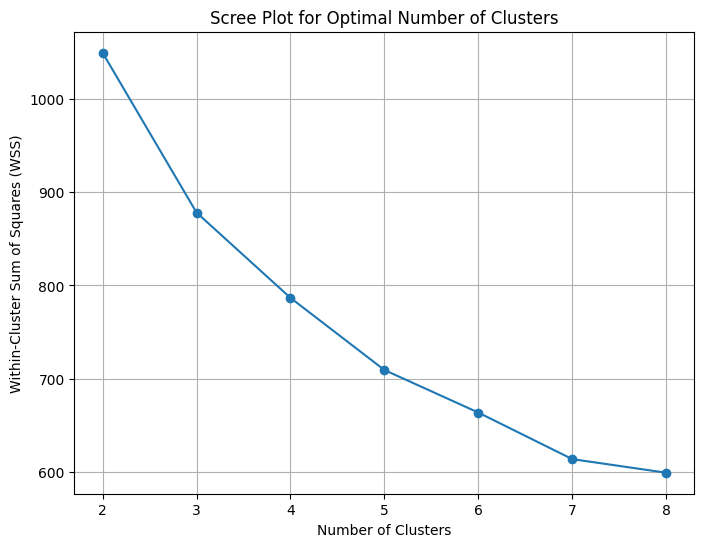

In [96]:
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, wss, marker='o')
plt.title('Scree Plot for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.grid(True)
plt.show()

In [97]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    
    # applying bootstrapping
    for _ in range(n_boot):
        sample_indices = np.random.choice(len(scaled_data), len(scaled_data), replace=True) #selecting random samples
        bootstrap_data = scaled_data[sample_indices]
        kmeans_bootstrap = KMeans(n_clusters=k, n_init=10, random_state=1234)
        kmeans_bootstrap.fit(bootstrap_data)
        bootstrap_labels = kmeans_bootstrap.labels_
        
        # Adjusted Rand Index
        ari = adjusted_rand_score(labels[sample_indices], bootstrap_labels)
        ari_scores[k].append(ari)

# Plot Adjusted Rand Index for Stability
mean_ari = [np.mean(ari_scores[k]) for k in cluster_range]



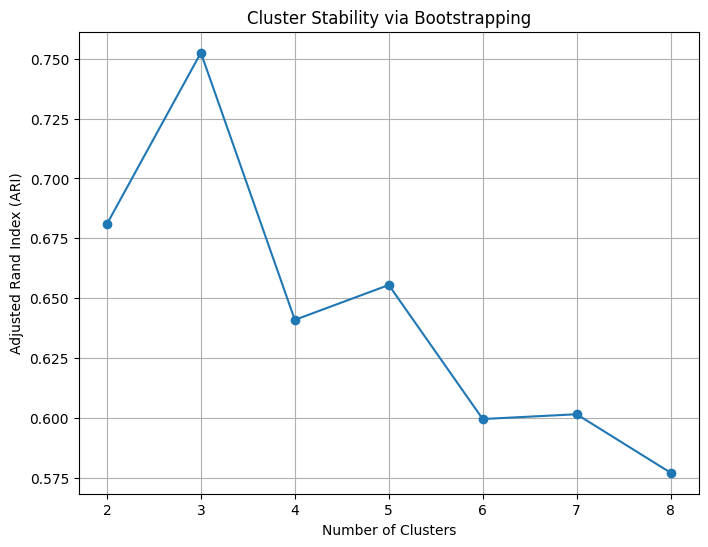

In [98]:
%matplotlib inline

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, mean_ari, marker='o')
plt.title('Cluster Stability via Bootstrapping')
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.grid(True)
plt.show()
# from the figure the optimal number of clusters would be 2


In [101]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=1234)
kmeans.fit(new_ev_df)
ev_df['Cluster'] = kmeans.labels_
new_ev_df['Cluster'] = kmeans.labels_

ev_df['Cluster']

0      0
1      0
2      0
3      0
4      0
      ..
98     1
99     1
100    1
101    2
102    1
Name: Cluster, Length: 103, dtype: int32

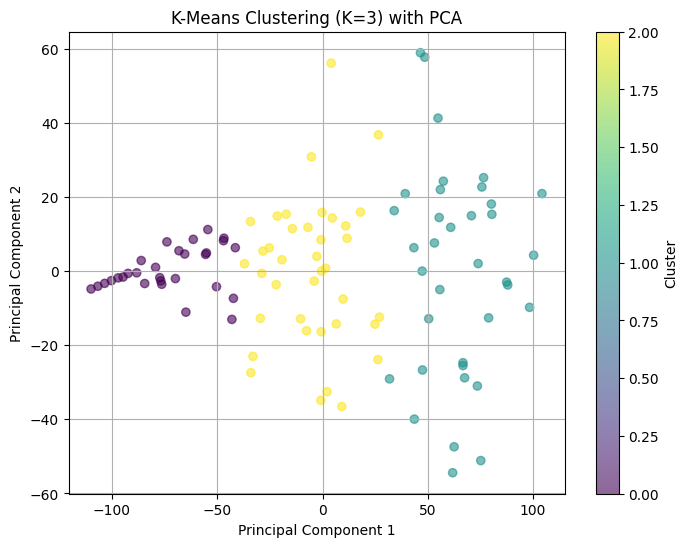

In [102]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(new_ev_df)
new_ev_df['PCA1'], new_ev_df['PCA2'] = pca_transformed[:, 0], pca_transformed[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(new_ev_df['PCA1'], new_ev_df['PCA2'], c=new_ev_df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering (K=3) with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [81]:
# Cluster characteristics
cluster_summary = ev_df.groupby('Cluster').mean()
print(cluster_summary)


TypeError: agg function failed [how->mean,dtype->object]

In [79]:
ev_df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,Cluster
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480,0
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000,0
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440,0
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040,0
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000,1
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050,1
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000,1
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000,2


In [82]:
cluster_summary = ev_df.groupby('Cluster').agg(lambda x: x.mean() if x.dtype in ['int64', 'float64'] else ' '.join(x))
print(cluster_summary)


                                                     Brand  \
Cluster                                                      
0        Tesla  Volkswagen  Polestar  BMW  Honda  Lucid...   
1        Tesla  Tesla  Jaguar  Renault  Ford  BMW  Pors...   
2        Volvo  Audi  Kia  Renault  Tesla  Mazda  Nissa...   

                                                     Model  AccelSec  \
Cluster                                                                
0        Model 3 Long Range Dual Motor ID.3 Pure 2 iX3 ...  7.003448   
1        Model S Performance Model Y Long Range Perform...  7.422857   
2        XC40 P8 AWD Recharge e-tron 50 quattro e-Niro ...  7.664103   

         TopSpeed_KmH    Range_Km  Efficiency_WhKm  \
Cluster                                              
0          180.241379  332.586207       175.620690   
1          180.971429  319.000000       201.057143   
2          176.820513  361.153846       188.564103   

                                            FastCharge_Km

In [83]:
# Save the cluster summary to a CSV file
cluster_summary.to_csv("cluster_summary.csv", index=True)
